<a href="https://colab.research.google.com/github/NoahGV/PRACTICA_1_AA_GRUPOB5/blob/main/Pr%C3%A1ctica1_GRUPO_B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 1**: Diseño, Entrenamiento y Test de un Sistema de Redes Neuronas Artificiales.

**GRUPO 2**

Lydia Sánchez-Cano Sánchez

Noah García Villanueva

Jonás Manuel García Vallejo


# INTRODUCCIÓN

Vamos a crear un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar imágenes de ropa en sus diferentes tipologías.

Este modelo será definido, configurado,  entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

En cada caso usaremos un tipo de función de activación y optimización distinta con distintas combinaciones.

Función de activación: Relu o Sigmoid

Optimización: Sgd o rmsprop


La clasificación corresponde, según el código numérico de clase, a:

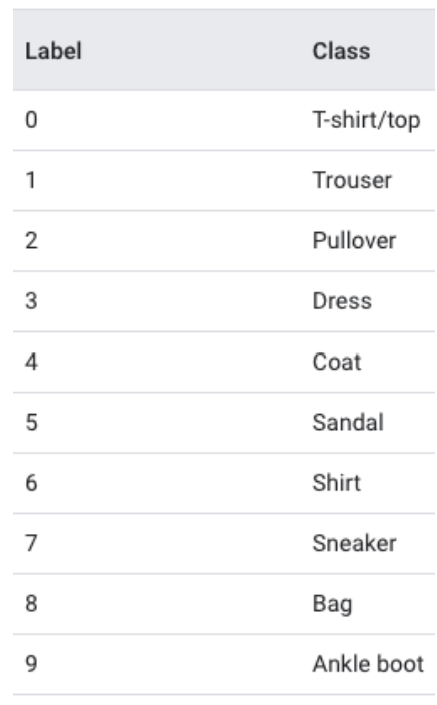

Creamos un modelo en Keras aplicando de una tirada todos los pasos al conjunto de datos Fashion-MNIST:

In [1]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
#print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: []
2.13.0


In [2]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS Fashion_MNIST EN KERAS
# fashion-mnist = tf.keras.datasets.fashion_mnist
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).

Echamos un vistazo a los **datos de entrenamiento**:

In [3]:
print(train_images.shape)

(60000, 28, 28)


Utilizamos 60000 imágenes de entramiento de 28*28 píxeles.

Echamos un vistazo a los **datos de test**:

In [4]:
print(test_images.shape)

(10000, 28, 28)


En las imágenes de test, tenemos 10000 imágenes de 28*28 píxeles.

In [5]:
# Vemos la matriz de la imagen número 20000 (28x28)
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

La imagen anterior corresponde con la categoría 7, que corresponde a una sneaker.

In [6]:
train_labels[20000]

7

Como habíamos mencionado anteriormente, corresponde a la etiqueta 7.

Veamos el elemento 20000 de las imágenes de entrenamiento y pintémoslo con matplotlib

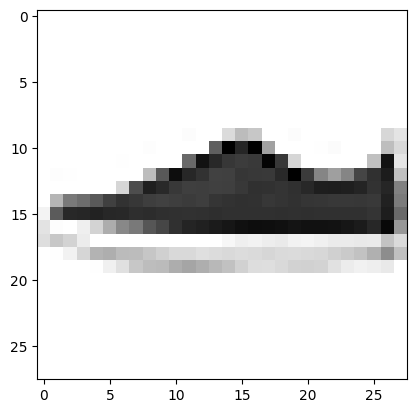

In [7]:
import matplotlib.pyplot as plt
digit = train_images[20000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Veamos el elemento 1  y pintémoslo con matplotlib.

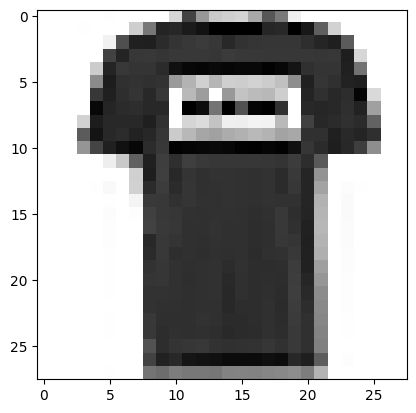

In [8]:
import matplotlib.pyplot as plt
digit = train_images[1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos que el elemento 1 es una camiseta.

In [9]:
train_labels[1]

0

Los **datos de prueba**:

In [10]:
test_images.shape

(10000, 28, 28)

Corresponde a la dimensión (28*28) que tiene las imagenes de test, que son 10000

In [11]:
len(test_labels)

10000

Comprobamos que tenemos 10000 etiquetas de test.

In [12]:
test_labels.shape, test_labels

((10000,), array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

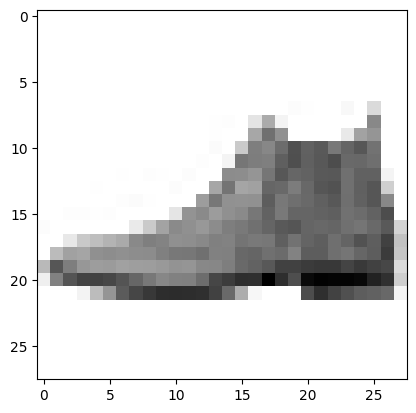

In [13]:
# Veamos el elemento 0 de test (que vemos que es un 9, que corresponde a ankle boot) y pintémoslo con matplotlib
import matplotlib.pyplot as plt
digit = test_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Primero normalizamos los datos para poder entrenar nuestra red neuronal.

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Y a continuación codificamos categóricamente las etiquetas. Para ello, usaremos el one-hot encoding.

En este caso transformaremos el vector en un vector de 10 ceros con un 1 en la posición que corresponda a la etiqueta.

In [15]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
#En el caso de la etiqueta 20000 ( que sabemos que era de la categoría 7) obtendríamos:
train_labels[20000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

Como podemos visualizar hemos conseguido transformar los datos y categorizarlos.

A continuación, vamos a hacer hincapié en el funcionamiento propio de la llamada "model.summary()" para poder explicar con claridad los resultados de cada uno de los casos. Su función principal es mostrar la estructura de la red neuronal a modo de tabla de la siguiente forma:


“Layer(type)” hace referencia al tipo de capas que emplea el sistema. En este caso emplearemos capas densas, lo que implica que cada neurona está conectada a todas las neurona de la capa siguiente.

“Output Shape” muestra la forma de los datos que se generan en la capa.

“Param” indica el número de parámetros en cada capa.
Y “Total params” muestra el número total de parámetros sumando todas las capas; separándolos en “Trainable params" para los parámetros entrenables y en”Non-trainable params” para los que no lo son.



# DESAROLLO DE CASOS

## Caso 1


Comenzaremos con nuestro primer caso, al que hemos denominado Caso 1.

En este primer caso la cantidad de neuronas de la primera capa será de 10, con una función de activación "relu" y un optimizador "sgd".

Comenzaremos construyendo la arquitectura de la red.

In [17]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten,Reshape

network = models.Sequential()

network = Sequential()
network.add(Flatten(input_shape=(28*28,)))  # Capa de entrada que acepta datos 28x28
network.add(Dense(10, activation='relu'))
network.add(Dense(10, activation='softmax'))
network.summary()
# (28*28)*10+10 = 7850
# (10*10)+10 = 110
# 7850+110=7960

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

El Flatten aplana las imágenes antes de pasarlas a una capa de neuronas densamente conectadas. Esta operación es importante ya que permite que las redes neuronales  trabajen con datos en un formato adecuado para aplicar operaciones de multiplicación y realizar cálculos en capas densamente conectadas.

En nuestra primera capa obtenemos: ( 28 * 28 ) * 10 + 10 de sesgo, es decir, 7850 parámetros.

En la segunda capa obtenemos: ( 10 * 10) + 10 de sesgo, es decir, 110 parámetros.

En total, 7850 + 110 son 7960 parámetros.


Ahora le metemos a nuestra network el optimizador, la función de pérdida y la métrica.

In [18]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Entrenamos la red con los datos de entrenamiento y las épocas que serán igual a 5.

In [19]:
history=network.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.9052 - accuracy: 0.6963
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5718 - accuracy: 0.8041
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5176 - accuracy: 0.8218
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4917 - accuracy: 0.8311
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4752 - accuracy: 0.8368


Comenzaremos explicando lo que es el accuracy ( o precisión ) y el loss ( o pérdida). Son dos métricas para evaluar el rendimiento de un modelo de aprendizaje automático, particularmente en problemas de clasificación.

El accuracy es la métrica que mide la proporción de predicciones correctas realizadas por un modelo de relación con el total de predicciones.

El loss es una métrica que evalúa cuán cerca o lejos están las predicciones del modelo de los valores reales ( etiquetas ) en el conjunto de datos de entrenamiento.

Nuestra red neuronal aprende a medida que pasan las épocas ya que empezamos con un accuracy de 0.6581 y finalmente consigue un accuracy de 0.8333.

La pérdida actúa de forma inversa al accuracy, es decir, tiene una pérdida del 0.9751 mientras que al final consigue un 0.4771.

In [20]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4963 - accuracy: 0.8263
test_loss: 0.49630987644195557
test_acc: 0.8263000249862671


Obtenemos un accuracy de 0.8216, es decir, podríamos llegar a la conclusión que realiza una buena precisión. Sin embargo, si nos fijamos en la pérdida, observamos que obtenemos un 0.5037, es decir, un valor muy grande que nos informa cuán de lejos están las predicciones del modelo de los valores reales en el conjunto de datos de entrenamiento.

In [21]:
# Definimos los colores de la gráfica en función al resultado que obtendremos

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 1s 1ms/step


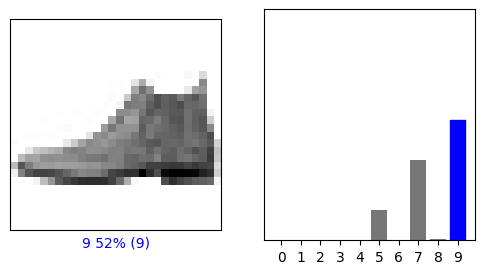

<Figure size 640x480 with 0 Axes>

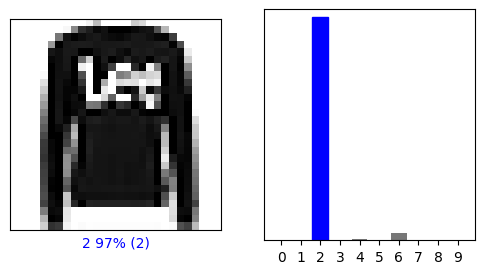

<Figure size 640x480 with 0 Axes>

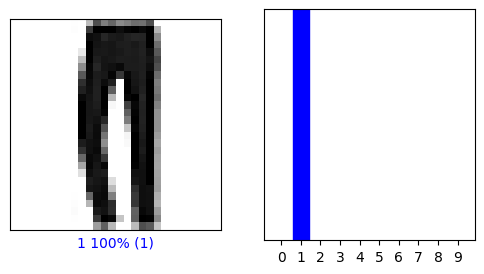

<Figure size 640x480 with 0 Axes>

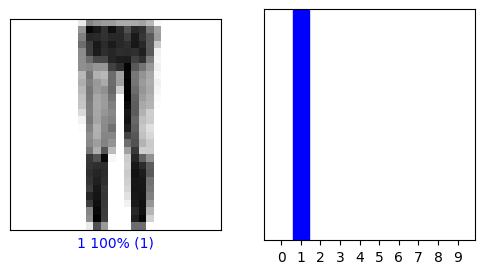

<Figure size 640x480 with 0 Axes>

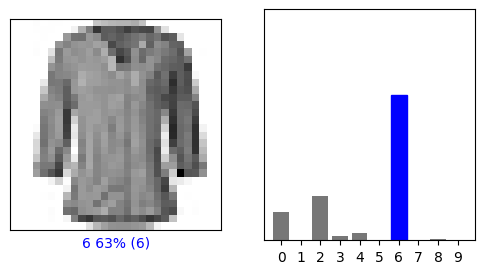

<Figure size 640x480 with 0 Axes>

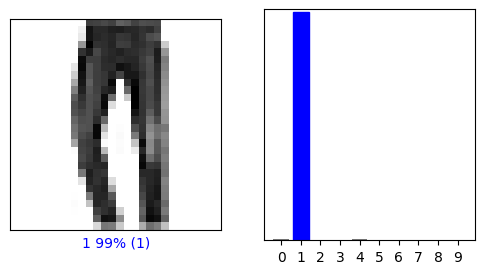

<Figure size 640x480 with 0 Axes>

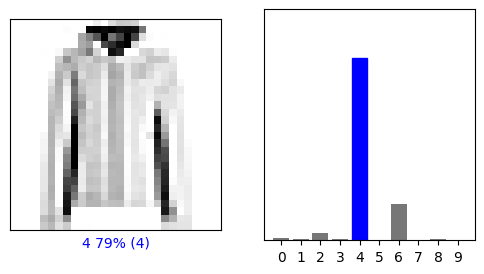

<Figure size 640x480 with 0 Axes>

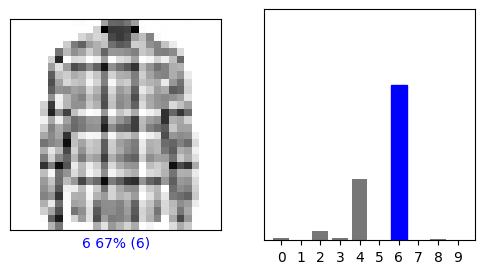

<Figure size 640x480 with 0 Axes>

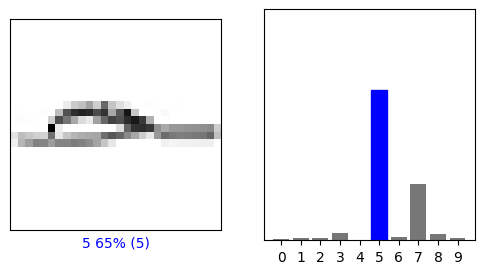

<Figure size 640x480 with 0 Axes>

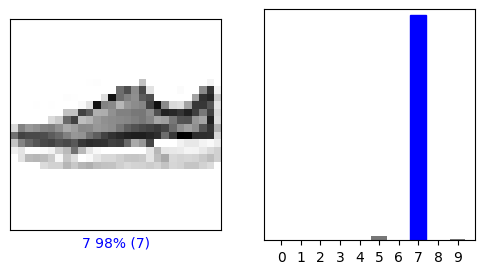

<Figure size 640x480 with 0 Axes>

In [22]:
# Normalizamos los datos y graficamos los 10 primeros elementos para ver cómo de bien o de mal se comporta nuestro modelo.
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Nuestra primera imagen estima con un 63% de probabilidad que se trata de una bota que es la etiqueta 9. Sin embargo, erróneamente puede llegar a clasificarlo en las etiquetas 5 o 7.


La segunda imagen, que se trata de un jersey, obtiene con un 94% de precisión la clasificación de la etiqueta 2, siendo muy buena precisión ya que únicamente puede confundirse con la etiqueta 6, que es una camiseta; son prendas muy similares.


En la tercera imagen, obtenemos con un 100% que se trata de la etiqueta 1 correspondiente a unos pantalones.


En la siguiente imagen obtenemos la misma precisión que es clasificada con éxito.


Sin embargo, en la quinta imagen clasifica con un 57% que se trata de la etiqueta 6, es decir, una camiseta. Por el contrario, podría clasificarla también como las etiquetas: 0,2,3,4 y 8.


Las siguientes imágenes predicen con más de un 70% que se trata de la etiqueta correspondiente, sin embargo, en la penúltima imagen obtenemos con un 66% que se trata de la etiqueta 5, es decir, una sandalia.


## Caso 2

Ahora realizaremos el caso 2 que consta de 10 neuronas en la primera capa, una función de activación "relu" y el optimizador "rmsprop".

**Normalizamos los datos y codificamos categóricamente las etiquetas.**


In [23]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
network2 = models.Sequential()
network2.add(Flatten(input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='relu'))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

En la primera capa tendremos 7850 parámetros que es el resultado de los siguientes cálculos: ( 28 * 28 ) * 10 + 10

En la segunda capa tendremos 110 parámetros que es el resultado de las siguientes operaciones: ( 10 * 10 ) +10

En total tenemos 7960 parámetros

In [25]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
history=network2.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6596 - accuracy: 0.7812
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4836 - accuracy: 0.8357
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4484 - accuracy: 0.8458
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4312 - accuracy: 0.8522
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4199 - accuracy: 0.8557


Realizamos el entrenamiento de la red neuronal con 5 épocas. Comenzamos con una pérdida alta (0.6422) y acaba con una de 0.4129. Sin embargo, la precisión comienza con un 0.7856 y termina con un 0.8558.

Aunque es verdad que la precisón es buena, la pérdida es muy alta.

In [27]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network2.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.4781 - accuracy: 0.8385
test_loss: 0.4780844748020172
test_acc: 0.8385000228881836


Finalmente, concluimos que, en este caso, no se trata de un buen modelo ya que se presenta un accuracy de 0.84219 pero una pérdida bastante alta de 0.45169

313/313 [==============================] - 0s 1ms/step


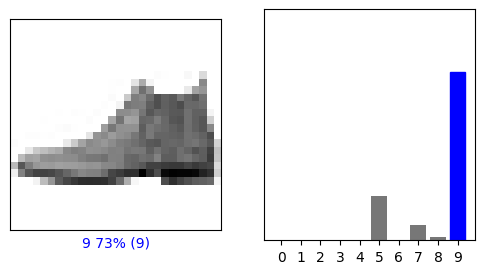

<Figure size 640x480 with 0 Axes>

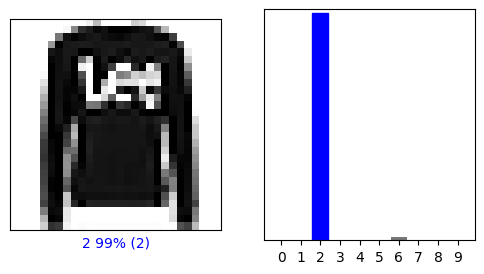

<Figure size 640x480 with 0 Axes>

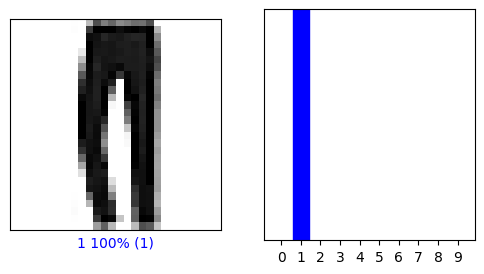

<Figure size 640x480 with 0 Axes>

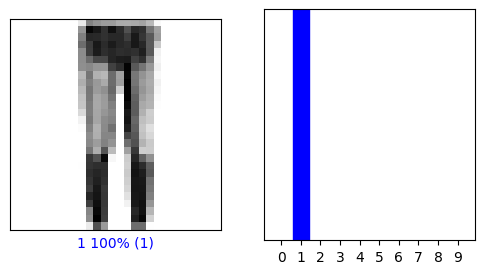

<Figure size 640x480 with 0 Axes>

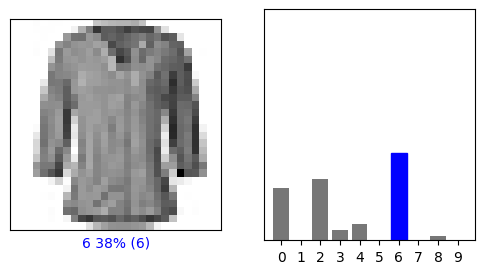

<Figure size 640x480 with 0 Axes>

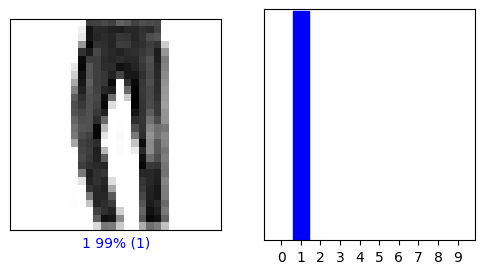

<Figure size 640x480 with 0 Axes>

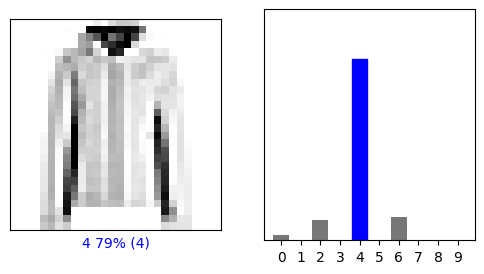

<Figure size 640x480 with 0 Axes>

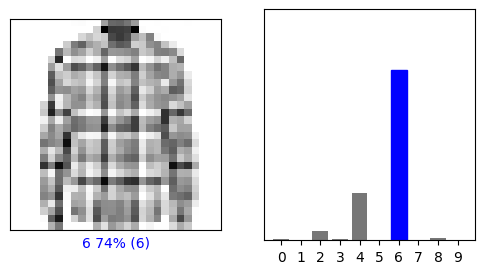

<Figure size 640x480 with 0 Axes>

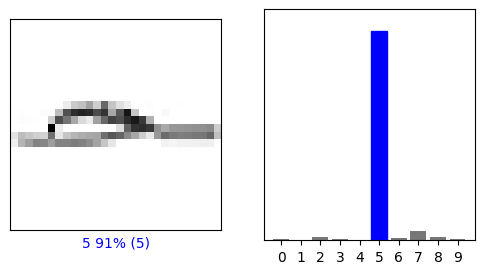

<Figure size 640x480 with 0 Axes>

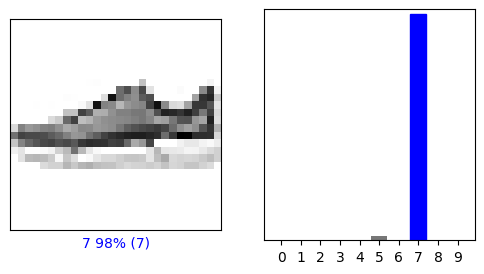

<Figure size 640x480 with 0 Axes>

In [28]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network2.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Aun teniendo una pérdida de 0.45, podemos llegar a otra conclusión y es que, como podemos comprobar en las gráficas, clasifica muy bien las imágenes ya que la probabilidad mínima que encontramos es de un 71% en la quinta imagen.
Se trata de una camiseta, que la clasifica con un 71% en la etiqueta 6, que coincide con la imagen.

### Caso  2 con 25 épocas

Ahora realizamos el mismo caso con la única diferencia del número de épocas, que serán 25.

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [29]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [30]:
network3 = models.Sequential()
network3.add(Flatten(input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='relu'))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

Tenemos el mismo número de parámetros que en el anterior caso, es decir, 7960 parámetros.

In [31]:
network3.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [32]:
history=network3.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6743 - accuracy: 0.7712
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4867 - accuracy: 0.8316
Epoch 3/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4579 - accuracy: 0.8422
Epoch 4/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4420 - accuracy: 0.8468
Epoch 5/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4316 - accuracy: 0.8520
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4237 - accuracy: 0.8530
Epoch 7/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4150 - accuracy: 0.8558
Epoch 8/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4085 - accuracy: 0.8575
Epoch 9/25
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4041 - accuracy: 0.8592
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.400

Aparentemente mejora el caso anterior, es decir, el mismo pero con 5 épocas ya que obtenemos una pérdida menor (0.3677) y una precisión mayor (0.8725).

In [33]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network3.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4746 - accuracy: 0.8407
test_loss: 0.474639892578125
test_acc: 0.8406999707221985


Sin embargo, seguimos con un modelo malo ya que el resultado de la pérdida sigue siendo alto (0.46304) y tenemos una precisión de 0.84270

313/313 [==============================] - 0s 1ms/step


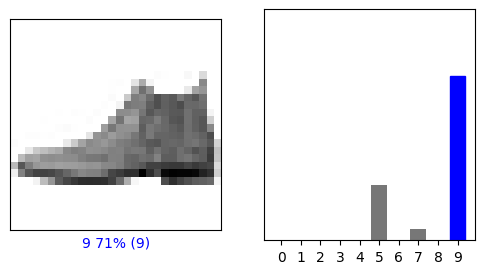

<Figure size 640x480 with 0 Axes>

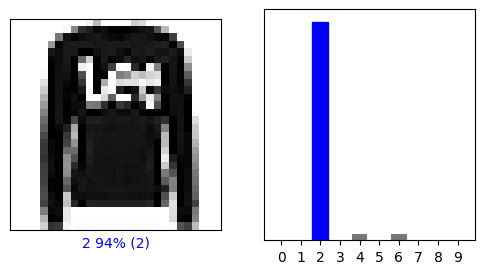

<Figure size 640x480 with 0 Axes>

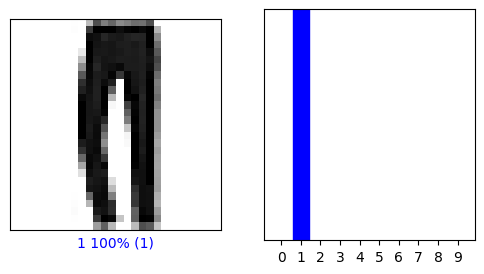

<Figure size 640x480 with 0 Axes>

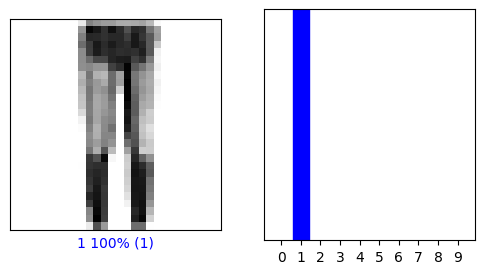

<Figure size 640x480 with 0 Axes>

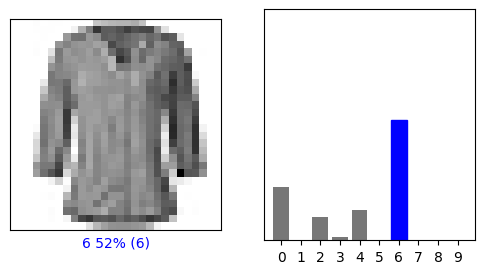

<Figure size 640x480 with 0 Axes>

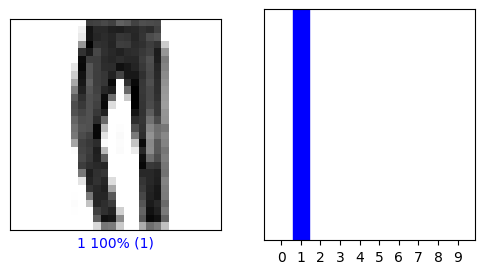

<Figure size 640x480 with 0 Axes>

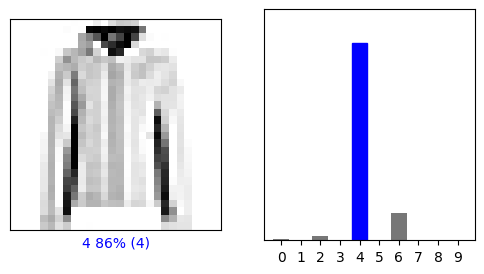

<Figure size 640x480 with 0 Axes>

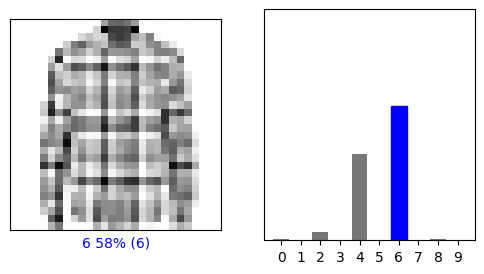

<Figure size 640x480 with 0 Axes>

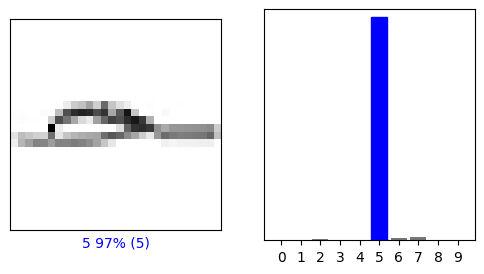

<Figure size 640x480 with 0 Axes>

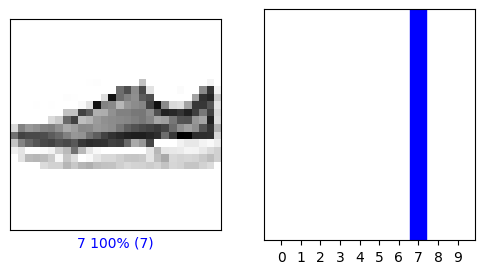

<Figure size 640x480 with 0 Axes>

In [34]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network3.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Clasifica mejor que el anterior salvo en la etiqueta 6, que solo clasifica un 57% de las imágenes en esa etiqueta.

## Caso 3

Comenzamos el caso 3 con una cantidad de 10 neuronas en la primera capa, una función de activación "sigmoid" y un optimizador "sgd"

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [35]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [36]:
network4 = models.Sequential()
network4.add(Flatten(input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='sigmoid'))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

En nuestra primera capa obtenemos: ( ( 28 * 28 ) * 10 ) + 10 = 7850 parámetros.

En la segunda capa tenemos: (10 * 10 ) + 10 = 110 parámetros.

En total son: 7850 + 110 = 7960 parámetros.

In [37]:
network4.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [38]:
history=network4.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7831 - accuracy: 0.4920
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2270 - accuracy: 0.6633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9923 - accuracy: 0.7085
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8700 - accuracy: 0.7322
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7917 - accuracy: 0.7488


Para este caso, la pérdida que obtenemos es muy alta llegando a un 0.7804, siendo mayor que la precisión que es un 0.7476.

Podemos intuir que no se trata de un buen modelo.

In [39]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network4.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.7752 - accuracy: 0.7466
test_loss: 0.7752060890197754
test_acc: 0.7465999722480774


Comprobamos que no se trata de un buen modelo ya que tenemos una pérdida mayor que la precisión, por lo que nuestro modelo no aprende.

313/313 [==============================] - 0s 1ms/step


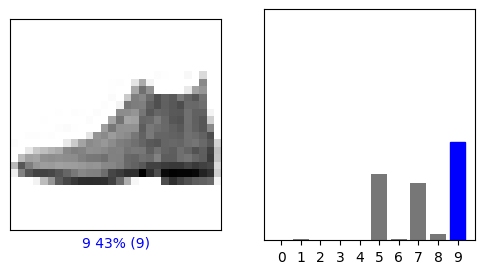

<Figure size 640x480 with 0 Axes>

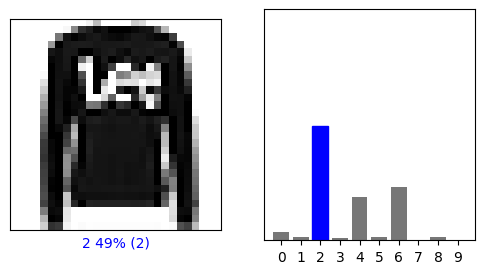

<Figure size 640x480 with 0 Axes>

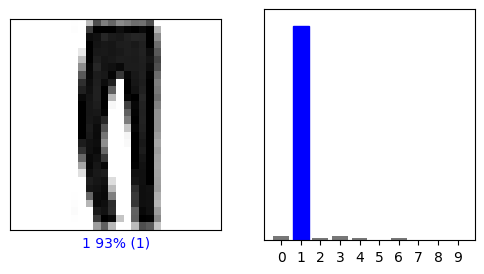

<Figure size 640x480 with 0 Axes>

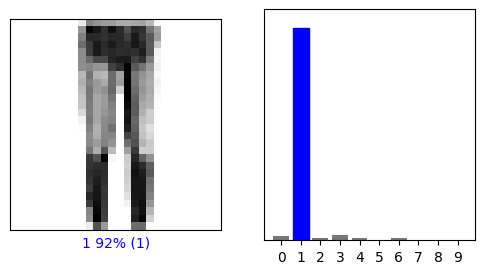

<Figure size 640x480 with 0 Axes>

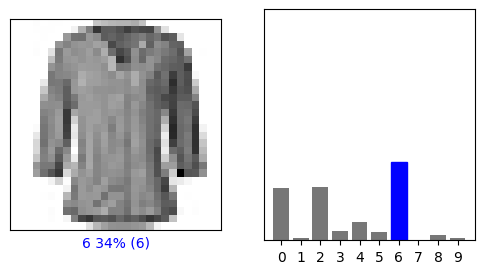

<Figure size 640x480 with 0 Axes>

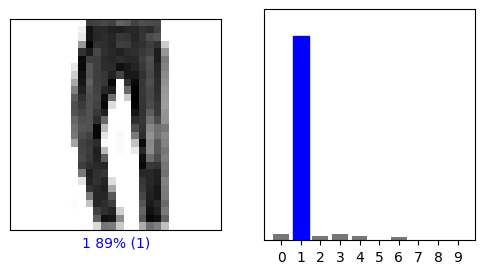

<Figure size 640x480 with 0 Axes>

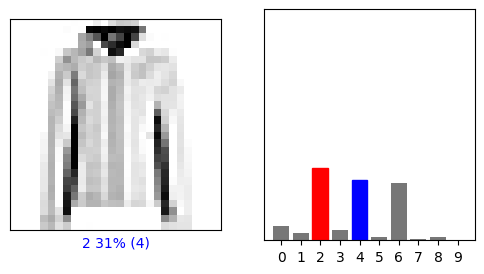

<Figure size 640x480 with 0 Axes>

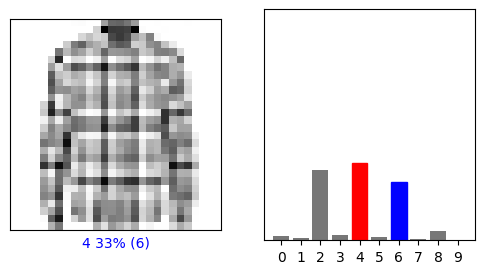

<Figure size 640x480 with 0 Axes>

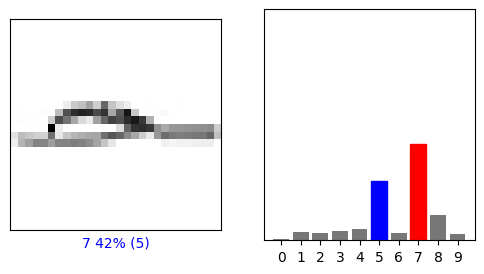

<Figure size 640x480 with 0 Axes>

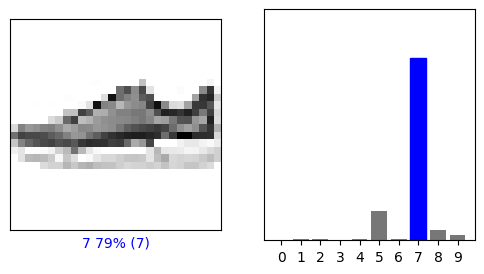

<Figure size 640x480 with 0 Axes>

In [40]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network4.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Efectivamente, concluimos que de los modelos que tenemos hasta ahora es el peor modelo y por lo tanto clasifica mal las imágenes.

Por ejemplo, la etiqueta que debería clasificarla como la 6, la clasifica como la etiqueta 4 en un 35%.

También, encontramos que la imagen de la sandalia que equivale a la etiqueta 5, la clasifica con un 44% en la etiqueta 7.

Los pantalones que en los casos anteriores los clafificaba un 100%, en este caso los clasifica entorno a un 90-94%

### Caso 3 con optmizador "adam"

Ahora realizamos el mismo caso 3, cambiando el optimizador. El que vamos a utilizar a continuación es el optimizador "adam"

Adam significa "Adative Moment Estimation", combina conceptos de otros dos optimizadores: El Descenso de Gradiente Estocastico y Rmsprop para aprovechar las ventajas de ambos en la optimización de redes neuronales.

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [41]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [42]:
network11 = models.Sequential()
network11.add(Flatten(input_shape=(28*28,)))
network11.add(layers.Dense(10, activation='sigmoid'))
network11.add(layers.Dense(10, activation='softmax'))
network11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                7850      
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

En la primera capa: ( (  28 * 28 ) * 10 ) + 10 = 7850 parámetros.

En la segunda capa: ( 10 * 10 ) + 10 = 110 parámetros.

En total, los parámetros resultantes son: 7960 parámetros.

In [43]:
network11.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Cambiamos el optimizador anterior por el que queremos, es decir, adam y posteriormente entrenamos el modelo con 5 épocas.

In [44]:
history=network11.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0181 - accuracy: 0.7116
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5660 - accuracy: 0.8128
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4865 - accuracy: 0.8352
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4494 - accuracy: 0.8441
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4292 - accuracy: 0.8507


El resultado de la precisión es de 0.8526, un accuracy bastante alto. Sin embargo, la pérdida que obtenemos es de 0.4249 que se trata de una pérdida muy alta por lo que nuestra primera idea es que el modelo es malo pero mejor que el anterior.

In [45]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network11.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4555 - accuracy: 0.8404
test_loss: 0.4555383324623108
test_acc: 0.840399980545044


Aunque el valor de pérdida es de 0.4543 que es un valor alto, nuestro modelo alcanza una precisión de 0.842199 siendo un valor bastante alto.

313/313 [==============================] - 0s 1ms/step


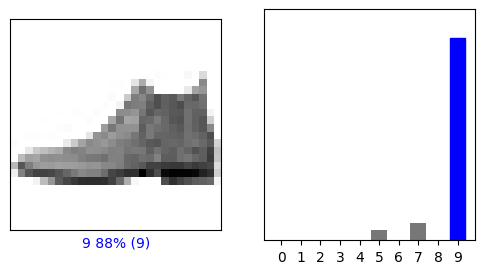

<Figure size 640x480 with 0 Axes>

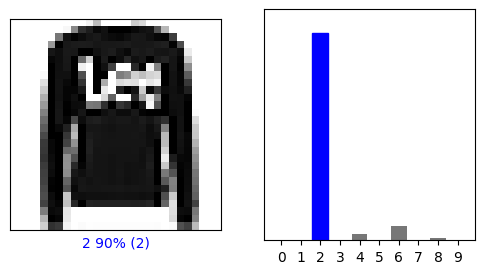

<Figure size 640x480 with 0 Axes>

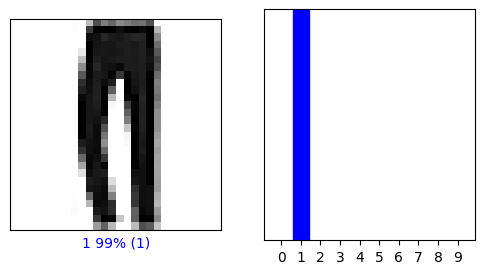

<Figure size 640x480 with 0 Axes>

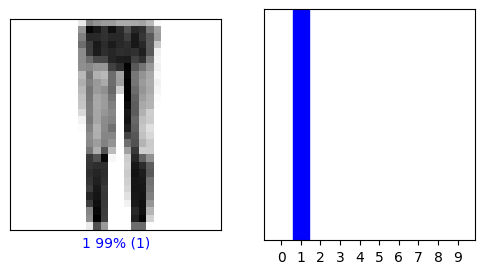

<Figure size 640x480 with 0 Axes>

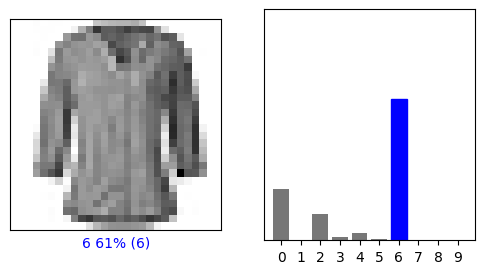

<Figure size 640x480 with 0 Axes>

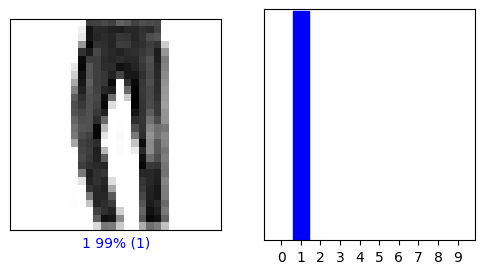

<Figure size 640x480 with 0 Axes>

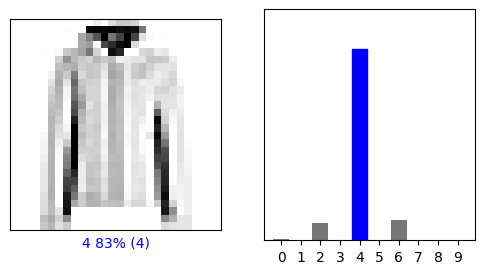

<Figure size 640x480 with 0 Axes>

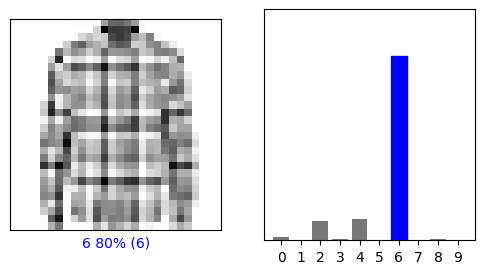

<Figure size 640x480 with 0 Axes>

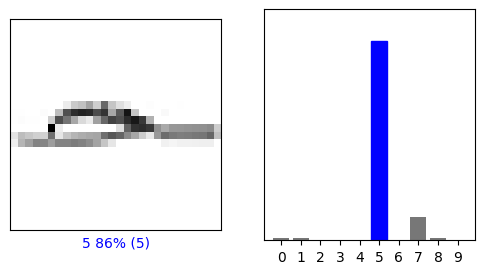

<Figure size 640x480 with 0 Axes>

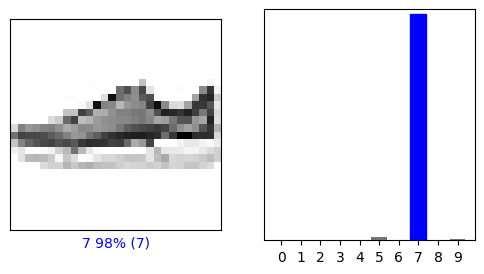

<Figure size 640x480 with 0 Axes>

In [46]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network11.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

En conclusión, nuestro modelo utlizando el optimizador Adam realiza una buena clasificación ya que solo podríamos decir que clasifica "mal" la etiqueta 6 con un 53% siendo los demás valores más altos que 78%.

## Caso 4

Continuaremos con el caso 4. En este caso la cantidad de neuronas de la primera capa será de 10, y usaremos la función de activación "sigmoid" y un optimizador "rmsprop"

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [47]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [48]:
network5 = models.Sequential()
network5.add(Flatten(input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='sigmoid'))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                7850      
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

En la primera capa tendremos 7850 parámetros que es el resultado de los siguientes cálculos: ( 28 * 28 ) * 10 + 10

En la segunda capa tendremos 110 parámetros que es el resultado de las siguientes operaciones: ( 10 * 10 ) +10

In [49]:
network5.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

ENTRENAMOS LA RED


In [50]:
history=network5.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0316 - accuracy: 0.6932
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.8027
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4958 - accuracy: 0.8337
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4523 - accuracy: 0.8465
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4311 - accuracy: 0.8520


En este caso vemos que se tiene una pérdida considerable de 0.4370. Mientras que la precisoón de 0.8479 no está mal no es lo suficientemente alta como para compensar una pérdida de 0.43.

Podemos intuir que no se trata de un buen modelo.

In [51]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network5.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.8400
test_loss: 0.47365501523017883
test_acc: 0.8399999737739563


Viendo estos resultados, sabemos que no se trata de un buen modelo ya que tiene una precisión de 0.8346 pero un pérdida demasiado alta, 0.4709.


313/313 [==============================] - 0s 1ms/step


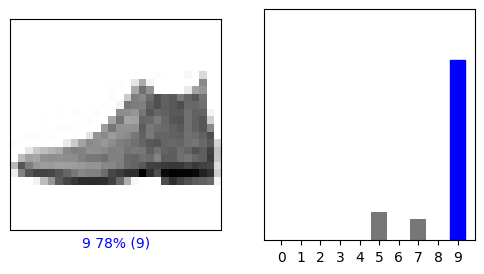

<Figure size 640x480 with 0 Axes>

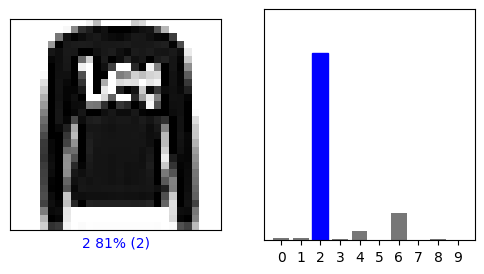

<Figure size 640x480 with 0 Axes>

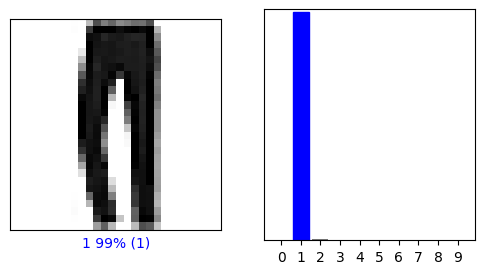

<Figure size 640x480 with 0 Axes>

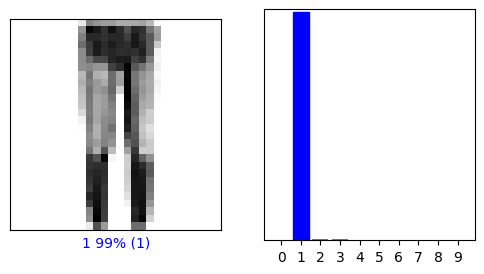

<Figure size 640x480 with 0 Axes>

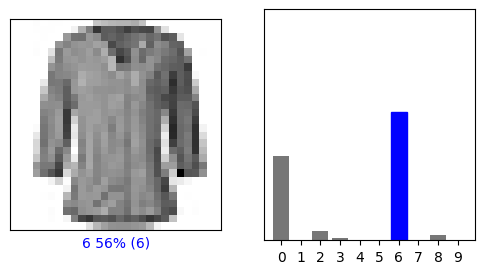

<Figure size 640x480 with 0 Axes>

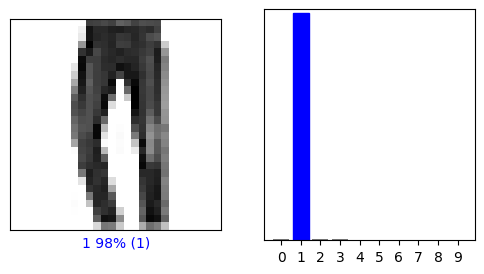

<Figure size 640x480 with 0 Axes>

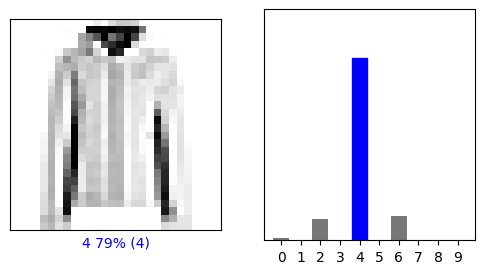

<Figure size 640x480 with 0 Axes>

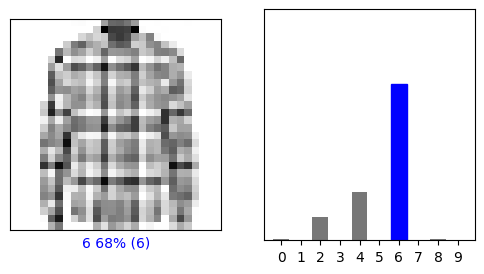

<Figure size 640x480 with 0 Axes>

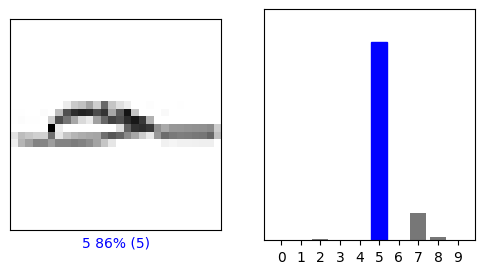

<Figure size 640x480 with 0 Axes>

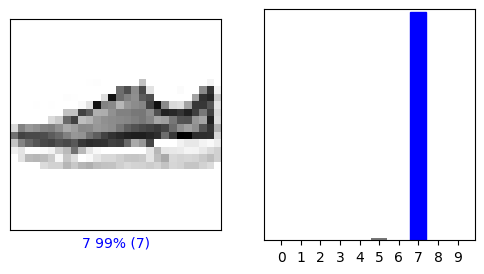

<Figure size 640x480 with 0 Axes>

In [52]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network5.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Por lo general podemos ver que los resultados no son demasiado malos, sin embargo en algunos aún se puede confundir.

Si nos fijamos, en la imagen 3, 4, 6 y 10 tiene mas de un 99% de certeza, por lo que los resultados son muy satisfactorios.

Las demás imagenes, aunque puede llegar a confundirse con otra etiqueta, detecta de forma correcta la que corresponde.

El peor resultado lo encontramos en la imagen 5, con un 58% de certeza. Se trata de la etiqueta 6, la cual a pesar de identificarla de forma correcta, muestra altos porcentajes con otras etiquetas, sobretodo la 2 y la 4.


## Caso 5

El siguiente caso es el 5. En este caso la camtidad de neuronas de la primera capa será de 512, y usaremos la función de activación "relu" y un optimizador "sgd"

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [53]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [54]:
network6 = models.Sequential()
network6.add(Flatten(input_shape=(28*28,)))
network6.add(layers.Dense(512, activation='relu'))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

En la primera capa tendremos 401920 parámetros que es el resultado de los siguientes cálculos: ( 28 * 28 ) * 512 + 512

En la segunda capa tendremos 5130 parámetros que es el resultado de las siguientes operaciones: ( 512 * 10 ) + 10

En total son: 401920   + 5130 = 407050 parámetros.

In [55]:
network6.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

ENTRENAMOS LA RED

In [56]:
history=network6.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.7018 - accuracy: 0.7750
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4991 - accuracy: 0.8301
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4575 - accuracy: 0.8439
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4335 - accuracy: 0.8495
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4155 - accuracy: 0.8567


En este caso vemos que se tiene una pérdida considerable de 0.4114 que disminuye bastante desde un 0.7037. Y tenemos una precisión de 0.8587 que es bastante buena.

Podemos intuir se trata de un modelo relativamente bueno, pero con bastante pérdia.

In [57]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network6.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4364 - accuracy: 0.8465
test_loss: 0.43637576699256897
test_acc: 0.8464999794960022


Finalmente vemos que tiene una périda de 0.4319 y un accuracy de 0.8487.
Vemos que nuestra red neuronal se ha sobre entrenado (como nos ha pasado en el caso anterior) pues en el entrenamiento la precisión es mayor que en el test.

313/313 [==============================] - 1s 2ms/step


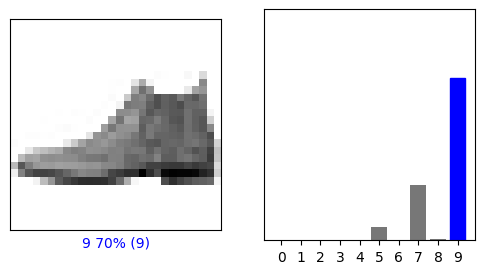

<Figure size 640x480 with 0 Axes>

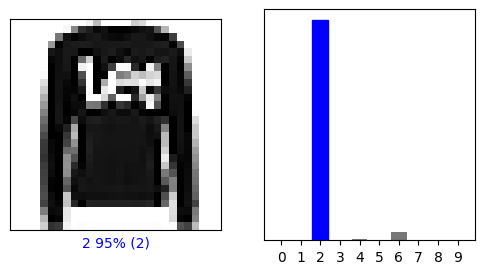

<Figure size 640x480 with 0 Axes>

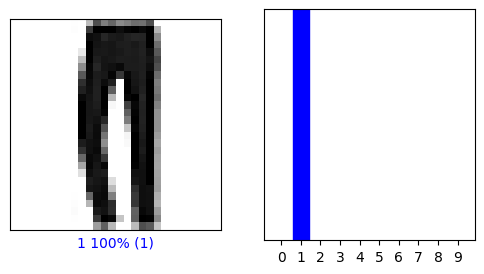

<Figure size 640x480 with 0 Axes>

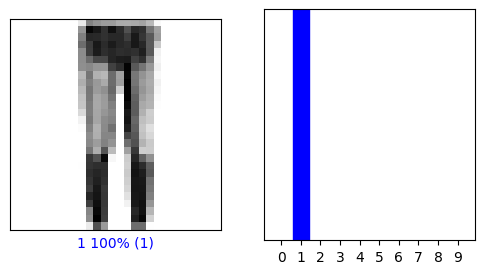

<Figure size 640x480 with 0 Axes>

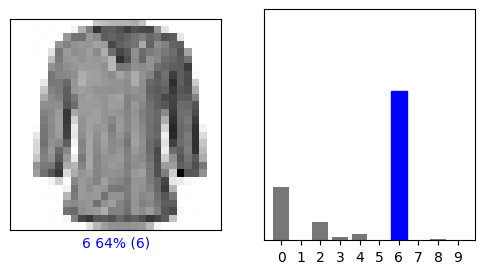

<Figure size 640x480 with 0 Axes>

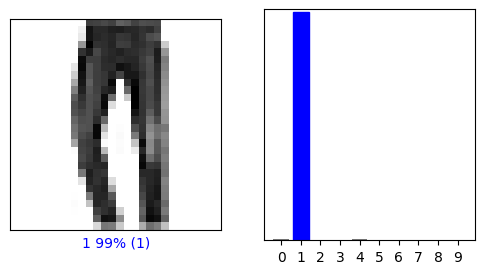

<Figure size 640x480 with 0 Axes>

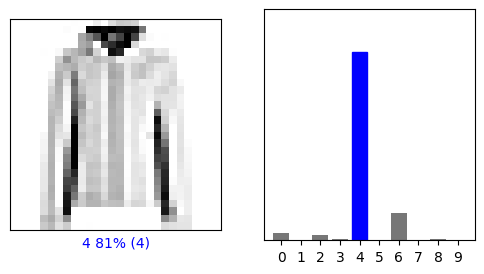

<Figure size 640x480 with 0 Axes>

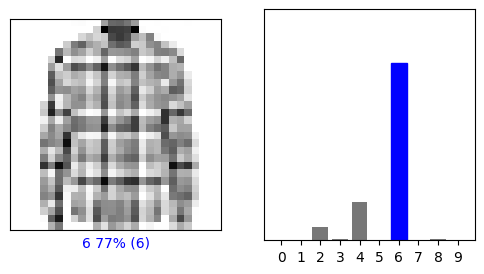

<Figure size 640x480 with 0 Axes>

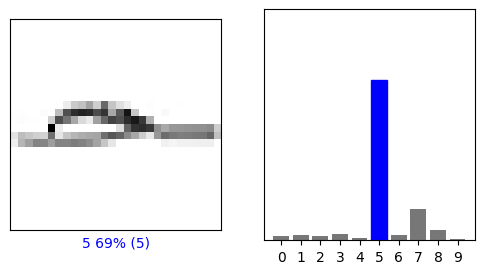

<Figure size 640x480 with 0 Axes>

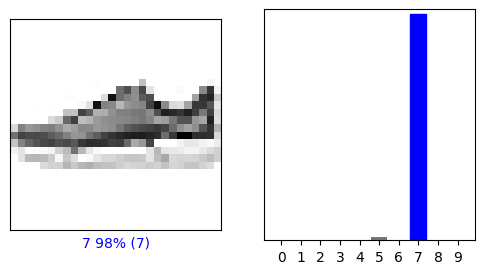

<Figure size 640x480 with 0 Axes>

In [58]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network6.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Esta red obtiene x imágenes con una certeza mayor a 90%. Y en aquellas de porcentaje menor sigue identificando de forma correcta las prendas.

La menor precisión es en la imagen 5, con un 61%, se trata de la etiqueta 6, que como hemos visto en los anteriores casos es la que más le cuesta diferenciar.

## Caso 6

Para nuestro caso 6, el número de neuronas por capa es de 512.
Emplearemos "relu" como función de activación y "rmsprop" para el optimizador.
A parte de estos ligeros cambios en la arquitectura de red, los parametros y conjuntos de datos serán los mismos que en los casos anteriores.

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [59]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [60]:
network7 = models.Sequential()
network7.add(Flatten(input_shape=(28*28,)))
network7.add(layers.Dense(512, activation='relu'))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

De forma similar a los casos anteriores, realizaremos un breve recorrido a través de la representación de la red neuronal para esta configuración.
Se trata de capas densas y al igual que en el anterior caso, al tener 512 neuronas en la primera capa obtenemos 401920 (28* 28* 512+512) parámetros; sumando los 5130 (10*512+10) parametros de la siguiente capa, hay un total de 407050 parametros.


In [61]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [62]:
history=network7.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7032 - accuracy: 0.7736
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4994 - accuracy: 0.8307
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4569 - accuracy: 0.8429
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4325 - accuracy: 0.8500
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4137 - accuracy: 0.8567


In [63]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network7.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4496 - accuracy: 0.8412
test_loss: 0.4496438503265381
test_acc: 0.8411999940872192


313/313 [==============================] - 1s 2ms/step


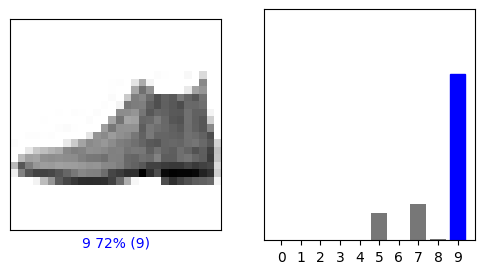

<Figure size 640x480 with 0 Axes>

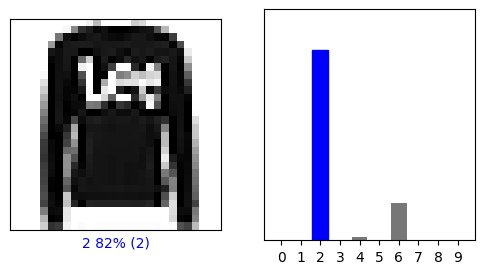

<Figure size 640x480 with 0 Axes>

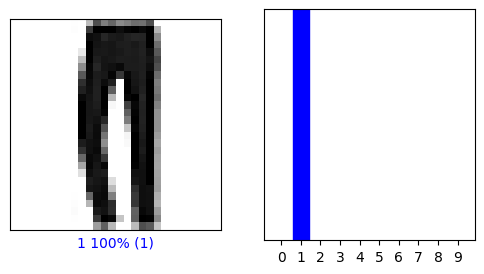

<Figure size 640x480 with 0 Axes>

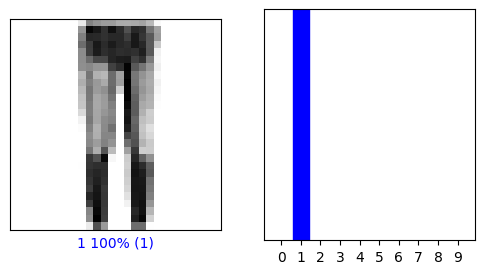

<Figure size 640x480 with 0 Axes>

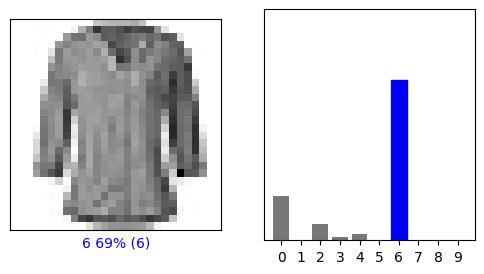

<Figure size 640x480 with 0 Axes>

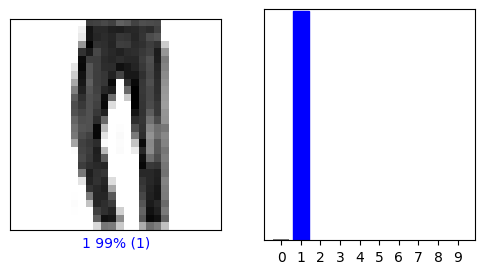

<Figure size 640x480 with 0 Axes>

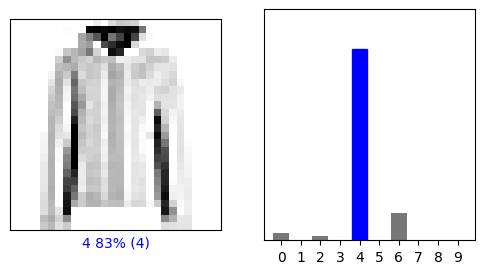

<Figure size 640x480 with 0 Axes>

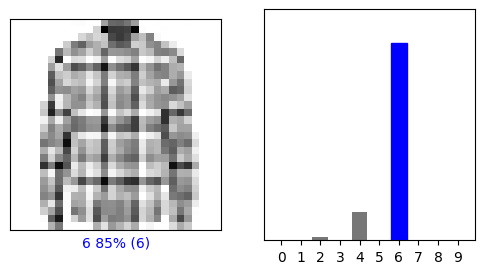

<Figure size 640x480 with 0 Axes>

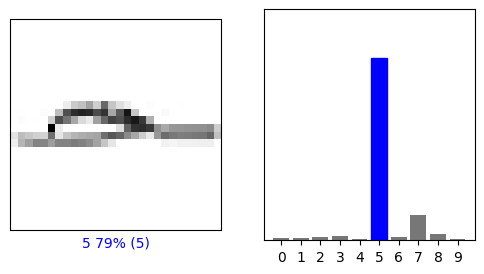

<Figure size 640x480 with 0 Axes>

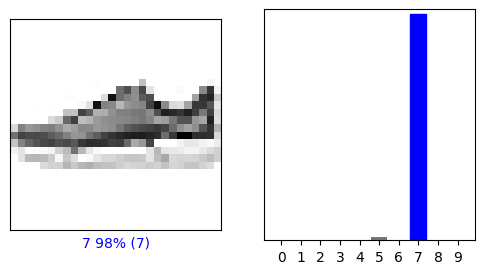

<Figure size 640x480 with 0 Axes>

In [64]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network7.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Tras realizar una rápida comparación con el caso 2, que emplea la misma función de activación y compilador con un menor número de neuronas, podemos concluir que este módelo es ligeramente inferior.
A pesar de que ambos ofrecen resultados similares, el caso 2 tiene una precisión algo mayor y un coste computacional menor debido a la cantidad de neuronas siendo menos.

Ejemplo:

Imagen 1: C2: 69%, C6: 66%

Imagen 9: C2: 84%, C6: 69%

## Caso 7

Para está configuración se mantendrá el número de neuronas en 512, pero modificaremos tanto la función de activación( "sigmoid" ) como el compilador( "sgd" ).

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [65]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [66]:
network8 = models.Sequential()
network8.add(Flatten(input_shape=(28*28,)))
network8.add(layers.Dense(512, activation='sigmoid'))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

A la hora de analizar los resultados que devuelve la función "summary" en este caso no encontramos grandes sorpresas, pues se han empleado el mismo tipo de capas y el mismo número de parametros que en los casos 5 y 6.

==> Capas densas

==> 401920 + 5130 = 407050 parametros

In [67]:
network8.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [68]:
history=network8.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.1531 - accuracy: 0.6780
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7132 - accuracy: 0.7622
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6255 - accuracy: 0.7836
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5783 - accuracy: 0.7985
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5483 - accuracy: 0.8088


In [69]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network8.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5566 - accuracy: 0.8017
test_loss: 0.5565537810325623
test_acc: 0.8016999959945679


Al igual que su semejante el caso 3, los resultados de la combinación "sigmoid" y "sgd" no son muy satisfactorios. Aun así, la mejora con respecto al caso 3 es muy significativa, por lo que aumentar la cantidad de neuronas para esta configuración es efectivo.

313/313 [==============================] - 1s 3ms/step


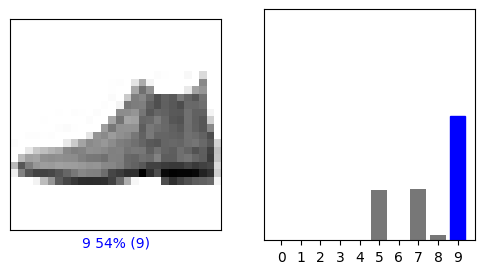

<Figure size 640x480 with 0 Axes>

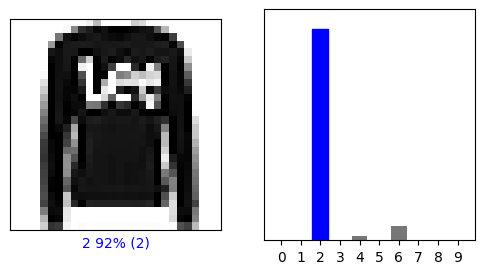

<Figure size 640x480 with 0 Axes>

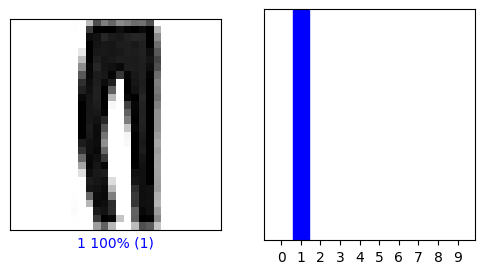

<Figure size 640x480 with 0 Axes>

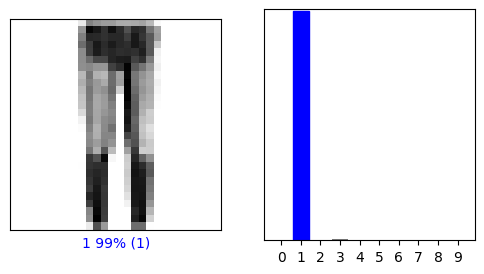

<Figure size 640x480 with 0 Axes>

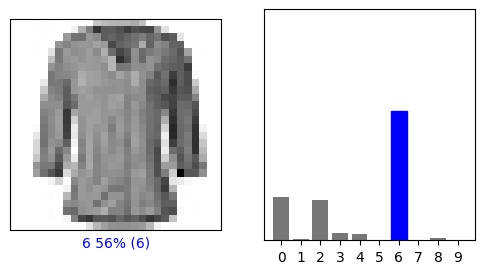

<Figure size 640x480 with 0 Axes>

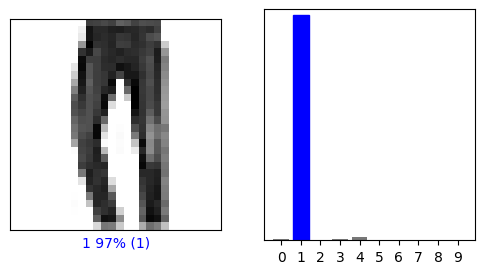

<Figure size 640x480 with 0 Axes>

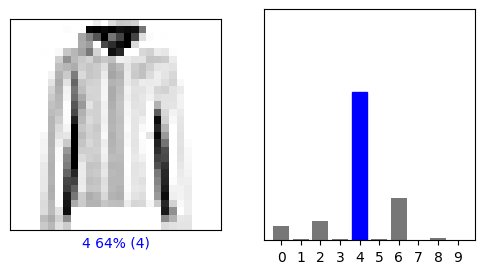

<Figure size 640x480 with 0 Axes>

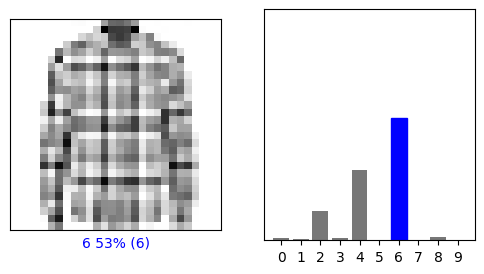

<Figure size 640x480 with 0 Axes>

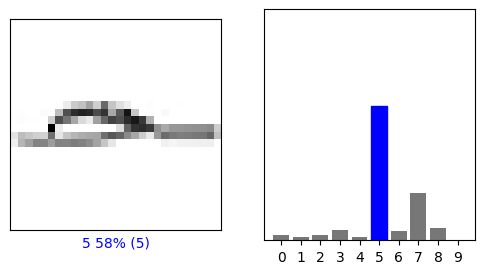

<Figure size 640x480 with 0 Axes>

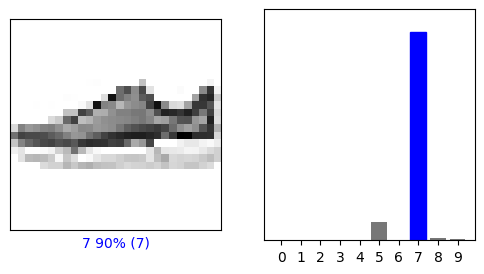

<Figure size 640x480 with 0 Axes>

In [70]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network8.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()


**Conclusiones de los resultados**

Como ya ha sido mencionado anteriormente, esta red no obtiene los mejores resultados.

Un punto destacable podría ser que identifica todas las prendas de forma exitosa, pues en la gráfica no encomtramos ningún parametro en rojo.

Aun así el porcentaje de certeza no es muy alto en varias imagenes.


### Caso con 7 con 25 épocas

Recrearemos la misma estructura neuronal empleando 25 épocas para ver los posibles cambios y mejoras que presenta el sistema; y estudiaremos si estos son significativos.

**Normalizamos los datos y codificamos categóricamente las etiquetas.**

In [71]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [72]:
network9 = models.Sequential()
network9.add(Flatten(input_shape=(28*28,)))
network9.add(layers.Dense(512, activation='relu'))
network9.add(layers.Dense(10, activation='softmax'))
network9.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

La función "summary()" presenta resultados idénticos a los anteriores casos, ya que no hemos modificado el número de neuronas.

In [73]:
network9.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [74]:
history=network9.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4947 - accuracy: 0.8234
Epoch 2/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3710 - accuracy: 0.8671
Epoch 3/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3419 - accuracy: 0.8783
Epoch 4/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3237 - accuracy: 0.8846
Epoch 5/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3121 - accuracy: 0.8918
Epoch 6/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2997 - accuracy: 0.8962
Epoch 7/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2909 - accuracy: 0.8998
Epoch 8/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2824 - accuracy: 0.9026
Epoch 9/25
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2765 - accuracy: 0.9064
Epoch 10/25
1875/1875 [==============================] - 11s 6ms/step - l

In [75]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network9.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.5807 - accuracy: 0.8865
test_loss: 0.5807326436042786
test_acc: 0.8865000009536743


Como se puede observar, hay una mejora del rendimiento significativa con respecto a la versión anterior. De hecho, podríamos afirmar que es la configuración que alcanza más precisión de todas las estudiadas hasta ahora.
Aunque cabe mencionar que hay presente sobreentrenamiento, pues la diferencia de precisión entre el entrenamiento tras las 25 épocas y la verificación con el conjunto de pruebas es superior en comparación con otros casos.


313/313 [==============================] - 1s 2ms/step


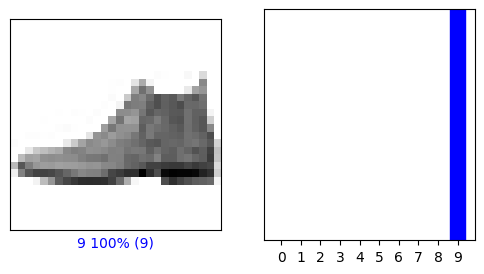

<Figure size 640x480 with 0 Axes>

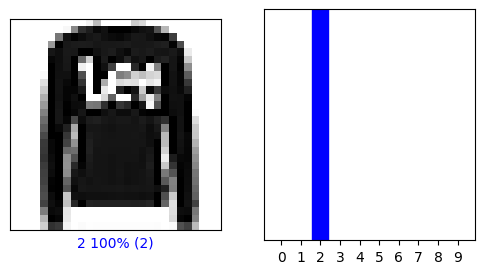

<Figure size 640x480 with 0 Axes>

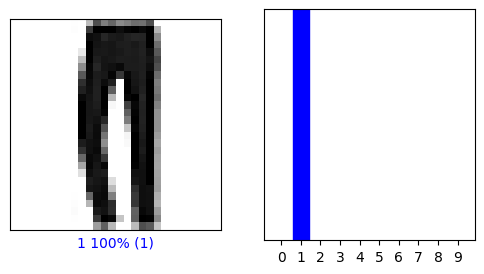

<Figure size 640x480 with 0 Axes>

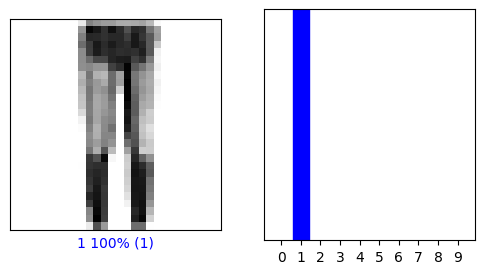

<Figure size 640x480 with 0 Axes>

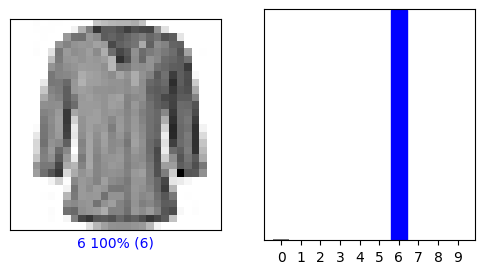

<Figure size 640x480 with 0 Axes>

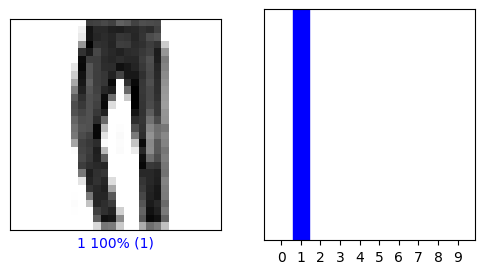

<Figure size 640x480 with 0 Axes>

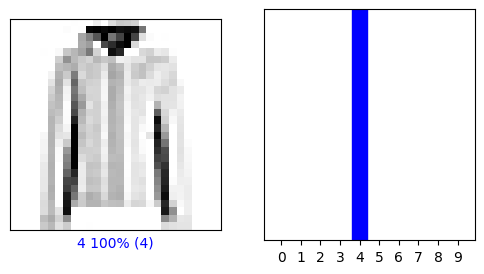

<Figure size 640x480 with 0 Axes>

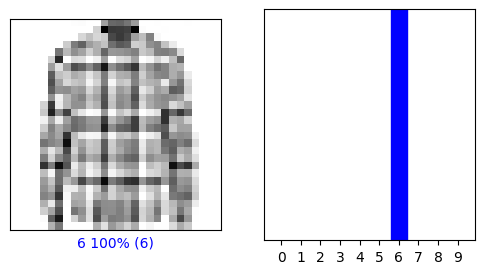

<Figure size 640x480 with 0 Axes>

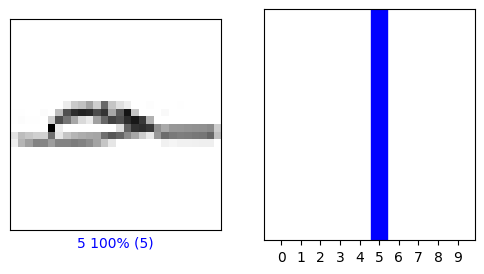

<Figure size 640x480 with 0 Axes>

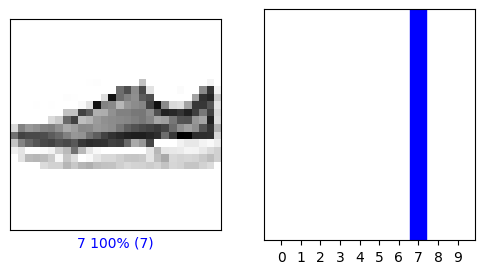

<Figure size 640x480 with 0 Axes>

In [76]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network9.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Aquí encontramos un caso muy particular. La red neuronal es capaz de reconocer con total precisión prácticamente  todas las prendas, llegando al 100% en todas menos una. Para la 6º imagen del conjunto de prueba, obtenemos una precisión del 73%; la cual es bastante alta considerando que es la prenda más difícil de identificar para todos los modelos.
No somos capaces de identificar la razón de este problema y resulta muy extraño no ser capaces de alcanzar mayor certeza dado el buen rendimiento con el resto de imágenes.


Asimismo, mediante estas pruebas hemos podido comprobar que "sigmoid" y "sgd" logran un rendimiento muy alto al aumentar la cantidad de neuronas y las épocas. Por lo tanto, es una configuración que necesita más iteraciones y potencia computacional para funcionar de forma efectiva. Al menos en el ejercicio que nos compete.


## Caso 8

Para el último caso, la cantidad de neuronas se mantiene en 512.
La función de activación es "sigmoid" y el optimizador "rmsprop"; configuración que ya fue empleada en el caso 4 con un menor número de neuronas.

**Normalizamos los datos y codificamos categóricamente las etiquetas.**




In [77]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [78]:
network10 = models.Sequential()
network10.add(Flatten(input_shape=(28*28,)))
network10.add(layers.Dense(512, activation='sigmoid'))
network10.add(layers.Dense(10, activation='softmax'))
network10.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Explicación del summary de la red:**

No hay nada relevante que comentar respecto al "summary()" de esta red, pues no se han realizado cambios que afecten al número de parámetros o tipo de capa.

In [79]:
network10.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [80]:
history=network10.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5195 - accuracy: 0.8131
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3953 - accuracy: 0.8568
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3560 - accuracy: 0.8697
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3311 - accuracy: 0.8795
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3116 - accuracy: 0.8857


In [81]:
#VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss, test_acc = network10.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3528 - accuracy: 0.8746
test_loss: 0.35279303789138794
test_acc: 0.8745999932289124


Tras haber realizado todas las pruebas pertinentes, es sin duda el modelo que logra los mejores resultados tomando en cuenta todo el conjunto.

Es especialmente notable la disminución en la perdida, ya que es el único modelo en el que este valor se encuentra por debajo de 0.43

En nuestra verificación ==> 0.3610.

313/313 [==============================] - 1s 2ms/step


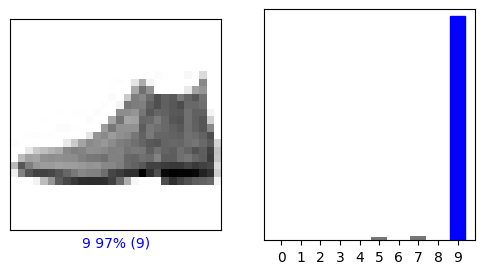

<Figure size 640x480 with 0 Axes>

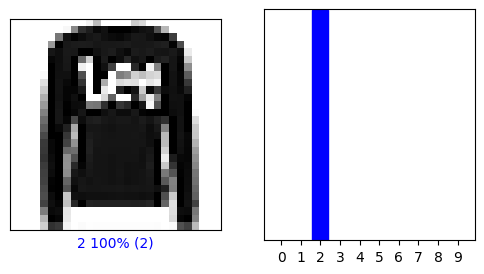

<Figure size 640x480 with 0 Axes>

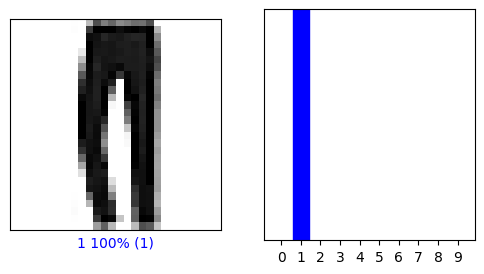

<Figure size 640x480 with 0 Axes>

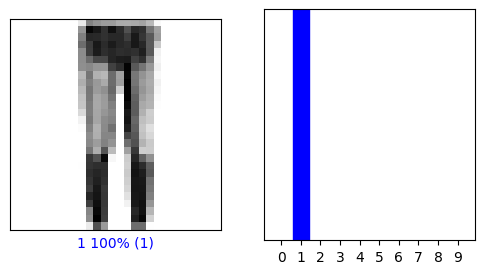

<Figure size 640x480 with 0 Axes>

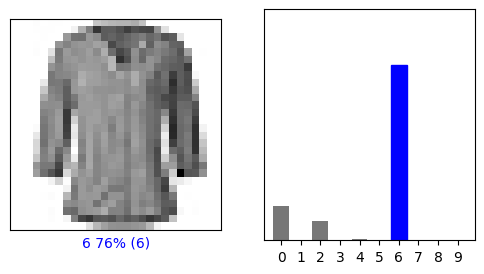

<Figure size 640x480 with 0 Axes>

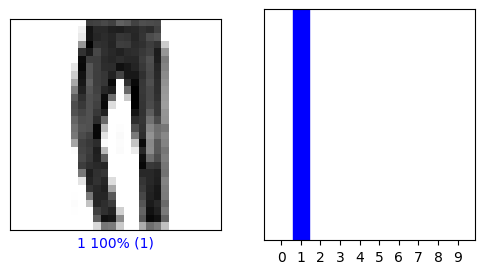

<Figure size 640x480 with 0 Axes>

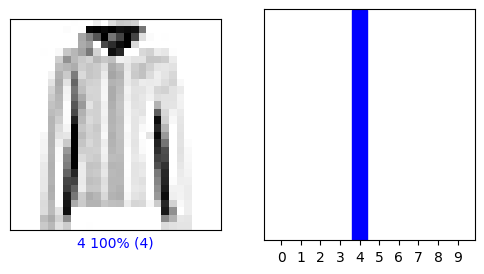

<Figure size 640x480 with 0 Axes>

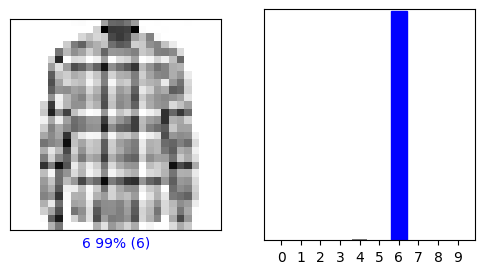

<Figure size 640x480 with 0 Axes>

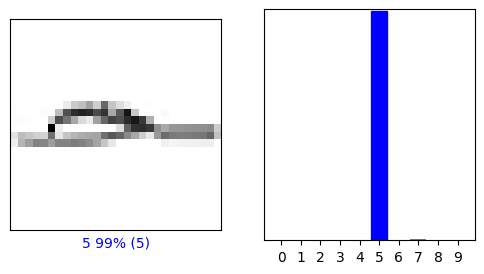

<Figure size 640x480 with 0 Axes>

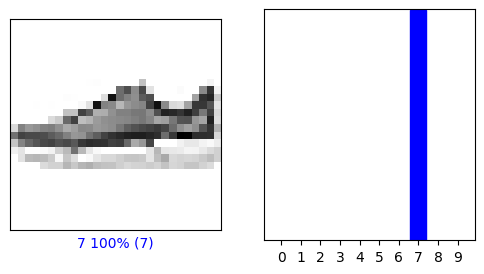

<Figure size 640x480 with 0 Axes>

In [82]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

predictions = network10.predict(test_images)

for i in range(10):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i],  test_labels)
  plt.show()
  plt.clf()

**Conclusiones de los resultados**

Como ya ha sido mencionado anteriormente, se trata de una arquitectura extremadamente eficiente.

Identifica casi todas las prendas con un 100% de precisión, no obstante para 3 etiquetas es ligeramente inferior. Por lo tanto realizando una comparación con la red anterior:

Imagen 1: C7(25): 100%, C8: 94%

Imagen 8: C7(25): 100%, C8: 99%

Imagen 10: C7(25): 100%, C8: 99%

Observamos que la precisión es más baja, pero tampoco podemos determinar si la diferencia es significativa.


# CONCLUSIONES
Nos gustaría comenzar expresando que ha sido bastante gratificante realizar un modelo funcional de algo que tiene tantas aplicaciones reales a día de hoy.


A la hora de desarrollar el código, no hemos encontrado grandes problemas para hacer funcionar los modelos, ya que, la plantilla proporcionada era bastante intuitiva. Sin embargo el rendimiento no era el esperado y se hacían presentes algunos problemas a la hora de procesar los datos. Tras ajustar el tamaño y formato de las entradas y corregir pequeños detalles de la arquitectura, el proceso ha sido bastante suave. Cada miembro del equipo ha realizado dos o tres casos individualmente y ha habido buena comunicación a la hora de solucionar los inconvenientes tanto de código y como de redacción de la memoria.

Con respecto a los resultados obtenidos, casi todas las arquitecturas presentan buenos resultados; alcanzando unos valores de pérdida y precisión bastante buenos. Resulta especialmente curioso el caso de las redes que emplean "sigmoid" y "sgd" conjuntamente, pues el modelo con 10 neuronas ("caso 3") en la primera capa es el único que presenta muy mal rendimiento al no ser capaz de identificar correctamente varias de las prendas. No obstante, al aumentar la cantidad de neuronas y las épocas, se transforma en la arquitectura que mejores resultados de precisión presenta.

Las redes con mejor rendimiento son, sin lugar a duda, la mencionada con anterioridad para el caso 7 con 25 épocas y la que ha sido empleada para el caso 8. La del caso 8 presenta una pérdida mucho menor, pero con respecto a la precisión se queda ligeramente atrás. Aun con todo, consideramos que esa arquitectura es la más adecuada para esta tarea de clasificación, pues obtiene resultados muy similares a la red del caso 7 con 25 épocas, usando tan solo 5 épocas y una pérdida significativamente menor.
A partir de estos datos podemos concluir, con carácter general (pues no se aplica del todo para los casos 2 y 6), que un mayor número de neuronas es beneficioso para reconocer el tipo de patrones con el que hemos trabajado.

Así mismo, nos gustaría recalcar que el tipo de prenda correspondiente a la etiqueta número 6 es la más difícil de identificar para todos los modelos; siendo la única que no es reconocida con un 100% de precisión en ningún caso y alcanzando su porcentaje más alto en 73%.

